In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


**Paso 1 cargar los datos** 

In [62]:
df = pd.read_csv("iris.data", names=['longitud sepalo','ancho sepalo','longitud petalo','ancho petalo','especie'])
df

,longitud sepalo,ancho sepalo,longitud petalo,ancho petalo,especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [63]:
# Dividir la matriz del dataset en dos partes

# la submatriz x contiene los valores de las primeras 4 columnas del dataframe y todas las filas
X = df.iloc[:,0:4].values
# El vector y contiene los valores de la 4 columna (especie)para todas las filas
y = df.iloc[:,4].values


**Paso 2 Normalizacion**

In [64]:
#Aplicar una transformación de los datos para poder aplicar las propiedades de la distribución normal
X_std = StandardScaler().fit_transform(X)


**Paso 3 Calculo de autovectores y autovalores (eigenvector/eigenvalue)**

In [65]:
# Calcular la matriz de covarianza
print('Matriz covarianza: \n%s' %np.cov(X_std.T))

Matriz covarianza: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [66]:
#Calcular los autovalores y autovectores de la matriz

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [67]:
#Para reducir las dimensionalidad perdiendo la menor informacion posible
# se debe descartar los autovectores cuyos autovalores sean más bajos, 
#ya que son aquellos que menos información aportan al conjunto global

#lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

#ordenar descendientemente
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
2.930353775589318
0.9274036215173415
0.1483422264816396
0.020746013995595936


**Paso 4 Seleccionamos los autovectores correspondientes a las componentes principales**

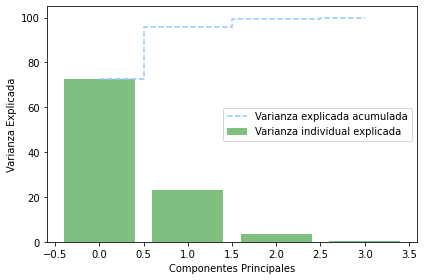

In [68]:
#“varianza explicada”: muestra cuánta varianza se puede atribuir a cada una de estas componentes principales

# A partir de los autovalores, se calcula la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representar en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(4), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

**Paso 5 proyectar los datos sobre un espacio de dimensionalidad menor**

In [69]:
#Generar la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)

Matriz W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


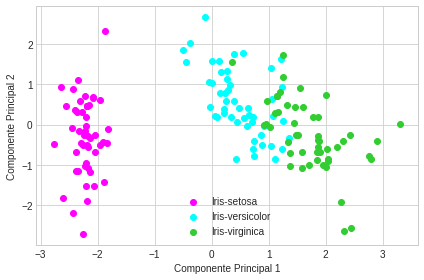

In [70]:
#Representar graficamente el nuevo espacio de datos
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('magenta', 'cyan', 'limegreen')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()